In [12]:
from wordcloud import WordCloud
import transformers
import nltk
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("resources/final.csv", low_memory=False)
text_list = data["Content"].tolist()
text = " ".join(text_list)
stopwords = nltk.corpus.stopwords.words('english')
scene_object_list = data["Scene"].unique().tolist() + data["Object"].unique().tolist()
tokenizer = transformers.BasicTokenizer(do_lower_case=True)
manual_stopwords = list(set([word for item in scene_object_list for word in tokenizer.tokenize(item)]))
stopwords = stopwords + manual_stopwords + [word.rstrip("s") for word in manual_stopwords]
len(text)

60235238

In [19]:
wordcloud = WordCloud(width=1600, height=1200, background_color="white", stopwords=stopwords, collocations=False)
wordcloud.generate(text)

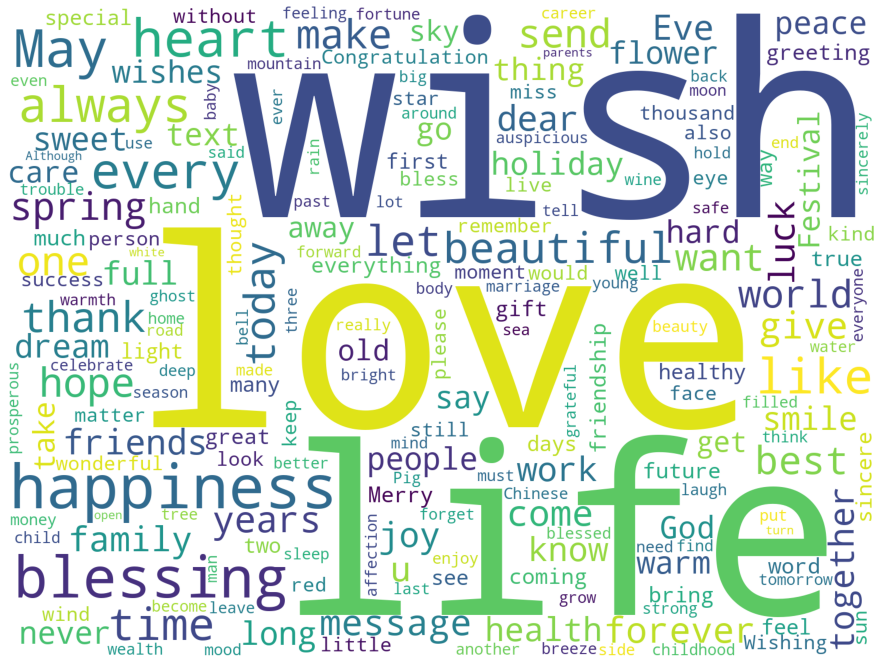

In [22]:
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("resources/wordcloud.pdf")